In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pattern_contrast.fibheap import FibonacciHeap as FibHeap
from pattern_contrast.peel_by_motif import *
from pattern_contrast.utils import *

import random
import pandas as pd
from datetime import datetime
import graph_tool.all as gt

In [3]:
import dsd
import pyintergraph

In [86]:
gt_Gs = []
nx_Gs = []
for idx in range(8, 9):
    edge_df = pd.read_csv('dataset/Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-condensed-edges.csv', header=0, dtype={'Weight':'double'})
    G = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.DiGraph())
    G = nx.convert_node_labels_to_integers(G)
    g = pyintergraph.nx2gt(G)
    rand_motif3 = gt.motifs(g, 3, return_maps=True)
    
    
    break

In [87]:
def multi_dsd(rand_motif3, node_num, dsd_times=5):
    results = []
    densities = []
    
    for i in range(len(rand_motif3[2])):
        cur_motif_list = rand_motif3[2][i]
        motif_list_by_nodelist = [list(m) for m in cur_motif_list]
        sub_re = [[] for dummy in range(dsd_times)]
        sub_den = [0.0 for dummy in range(dsd_times)]
        for j in range(dsd_times):
            result_s, density = dsd.exact_densest(motif_list_by_nodelist)
            nxt_motif_list = []
            for motif in motif_list_by_nodelist:
                if not any(m in result_s for m in motif):
                    nxt_motif_list.append(motif)

            motif_list_by_nodelist = nxt_motif_list

    #         motif_list_by_nodelist = [motif for motif in motif_list_by_nodelist if all(m in result_s for m in motif)]
            sub_re[j] = result_s
            sub_den[j] = density
            if len(motif_list_by_nodelist)==0:
                print('No more motif', i, 'left after finding', j+1, 'densest subgraph')
                break
        results.append(sub_re)
        densities.append(sub_den)
        
    x_ticks = [str(i) for i in range(1,14)]

    plt.plot(x_ticks, densities, label='densest')

    global_den = np.array(rand_motif3[1])/node_num
    plt.plot(x_ticks, global_den, label='global')
    plt.legend()
    plt.ylabel('density')
    plt.show()
    
    densities = np.asarray(densities)
    for i in range(dsd_times):
        plt.plot(x_ticks, densities[:,i]/global_den)
    plt.ylabel('density ratio')
    plt.show()
    
    plt.plot(x_ticks, [len(result[0])/node_num for result in results])
    plt.ylabel('size ratio')
    plt.show()
    return results

No more motif 0 left after finding 1 densest subgraph
No more motif 1 left after finding 1 densest subgraph
No more motif 2 left after finding 2 densest subgraph
No more motif 4 left after finding 1 densest subgraph
No more motif 5 left after finding 3 densest subgraph
No more motif 6 left after finding 5 densest subgraph
No more motif 7 left after finding 4 densest subgraph
No more motif 8 left after finding 4 densest subgraph


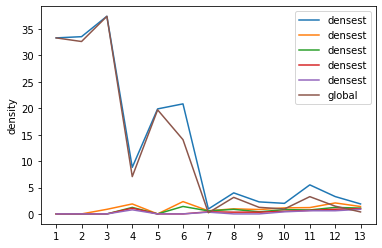

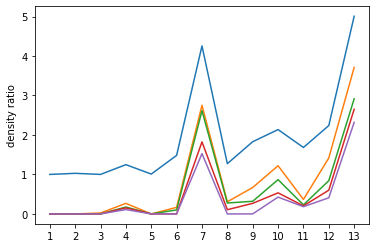

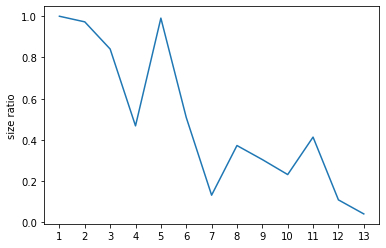

In [88]:
results = multi_dsd(rand_motif3, len(G.nodes()))

# Create hierarchical decomposition of the network

In [103]:
def coverage(setA, setB):
    if len(setA)<len(setB):
#         print('set A is smaller than set B!')
        return -1
    if len(setB)==0:
        return -1
    if (setA)==setB:
        print('two sets are the same!!')
        return 0
    return len(setA & setB)/len(setB)

In [113]:
node_names = {}
for i in range(13*5):
    node_names[i] = str(1+int(i/5)) + 'motif ' + str(1+i%5)+'dsd'

tree = nx.DiGraph()
for i in range(13*5):
    for j in range(13*5):
        if i==j:
            continue
        temp = coverage(set(results[int(i/5)][i%5]), set(results[int(j/5)][j%5]))
        if temp>0.75:
            tree.add_edge(node_names[i], node_names[j])

In [114]:
to_remove = []
for i in tree.nodes():
    for j in tree[i]:
        for k in tree[j]:
            if k in tree[i]:
                to_remove.append((i,k))
                
tree.remove_edges_from(to_remove)

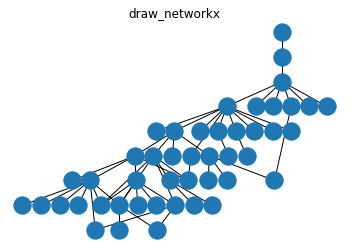

In [115]:
from networkx.drawing.nx_agraph import graphviz_layout

nx.nx_agraph.write_dot(tree,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=graphviz_layout(tree, prog='dot')
nx.draw(tree, pos, with_labels=False, arrows=False)

<img src="hierarchy.png">

# subgraphs concentrated with motif 13

number of nodes 9


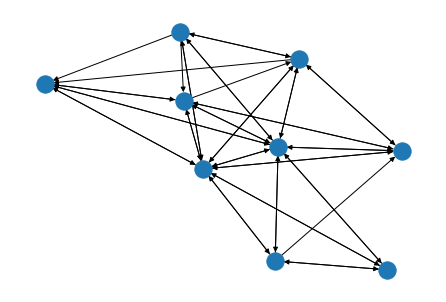

number of nodes 5


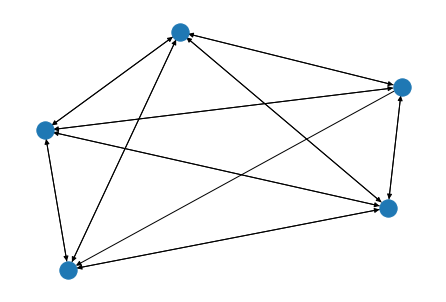

number of nodes 10


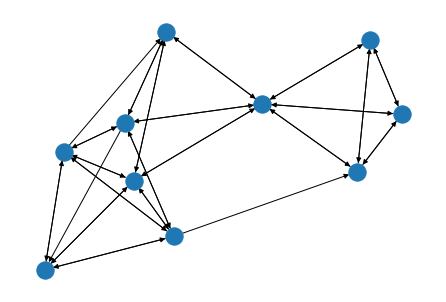

number of nodes 5


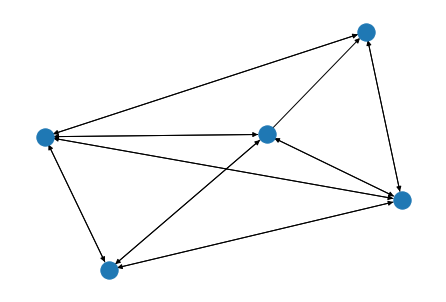

number of nodes 16


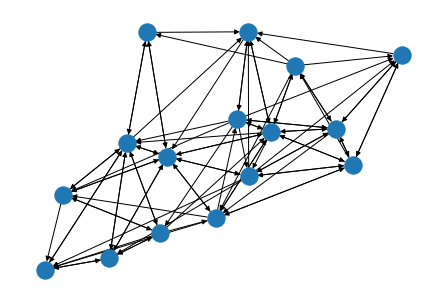

In [65]:
for sub in results[12]:
    if len(sub)==0:
        break
    print('number of nodes', len(sub))
    nx.draw(G.subgraph(sub))
    plt.show()

24


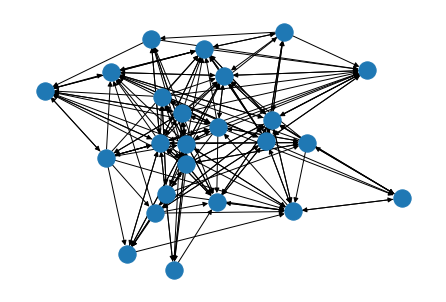

In [41]:
print(len(results[11]))
nx.draw(G.subgraph(results[11]))

# evaluate random models with respect to this

# dual config model

No more motif 0 left after finding 1 densest subgraph
No more motif 1 left after finding 1 densest subgraph
No more motif 2 left after finding 1 densest subgraph
No more motif 3 left after finding 3 densest subgraph
No more motif 4 left after finding 1 densest subgraph
No more motif 5 left after finding 2 densest subgraph
No more motif 6 left after finding 2 densest subgraph
No more motif 7 left after finding 4 densest subgraph
No more motif 8 left after finding 5 densest subgraph
No more motif 9 left after finding 2 densest subgraph
No more motif 10 left after finding 4 densest subgraph
No more motif 11 left after finding 3 densest subgraph
No more motif 12 left after finding 3 densest subgraph


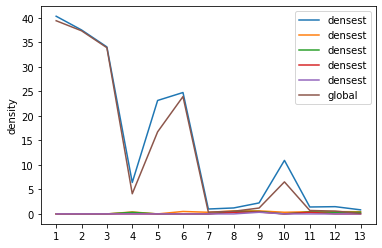

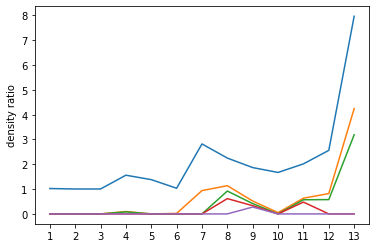

In [73]:
str2gt = {'000000000000000000000000000000800000000000000080': 1, '000000000000000000000000000000800000000000000040': 2, '0000000000000000000000000000000000000000000000c0': 0, '0000000000000000000000000000002000000000000000c0': 4, '000000000000004000000000000000800000000000000080': 5, '0000000000000020000000000000002000000000000000c0': 9, '0000000000000000000000000000008000000000000000c0': 3, '000000000000000000000000000000a000000000000000c0': 7, '000000000000004000000000000000a000000000000000c0': 11, '0000000000000040000000000000008000000000000000c0': 8, '0000000000000040000000000000002000000000000000c0': 10, '000000000000006000000000000000a000000000000000c0': 12, '000000000000004000000000000000200000000000000080': 6}
un_deg = [len([v for v in G[u] if u in G[v]]) for u in G.nodes]
lamd1 = sum([un_deg[i]*un_deg[j] for j in range(len(un_deg)) for i in range(j+1, len(un_deg))])/(sum(un_deg)/2)

indeg = [i[1] for i in G.in_degree]
outdeg = [i[1] for i in G.out_degree]

indeg = [indeg[i]-un_deg[i] for i in range(len(indeg))]
outdeg = [outdeg[i]-un_deg[i] for i in range(len(indeg))]
lamd2 = sum([i*j for i in indeg for j in outdeg])/(len(G.edges)-sum(un_deg))

double_config_counts = []
for time in range(1):
    rand_G = gt.Graph()
    rand_G.add_vertex((len(un_deg)))
    for i in range(len(un_deg)):
        for j in range(i+1, len(un_deg)):
            if random.uniform(0, 1)<un_deg[i]*un_deg[j]/lamd1:
                rand_G.add_edge(i,j)
                rand_G.add_edge(j,i)
    for i in range(len(indeg)):
        for j in range(len(outdeg)):
            if i!=j and rand_G.edge(i,j) is None and random.uniform(0, 1)<indeg[i]*outdeg[j]/lamd2:
                rand_G.add_edge(i,j)
    rand_motif3 = gt.motifs(rand_G, 3, return_maps=True)
    
    multi_dsd(rand_motif3, len(rand_G.nodes()))

In [70]:
np.mean(double_config_counts,axis=1)

array([8296.13333333, 8081.56666667, 7587.03333333,  865.46666667,
       3670.03333333, 5534.56666667,   57.46666667,  112.26666667,
        258.43333333,  971.7       ,  724.6       ,  147.13333333,
         29.36666667])

# k core model

No more motif 0 left after finding 5 densest subgraph
No more motif 1 left after finding 1 densest subgraph
No more motif 2 left after finding 1 densest subgraph
No more motif 3 left after finding 1 densest subgraph
No more motif 4 left after finding 1 densest subgraph
No more motif 5 left after finding 1 densest subgraph
No more motif 6 left after finding 4 densest subgraph
No more motif 7 left after finding 5 densest subgraph
No more motif 8 left after finding 5 densest subgraph
No more motif 10 left after finding 4 densest subgraph
No more motif 11 left after finding 5 densest subgraph
No more motif 12 left after finding 3 densest subgraph


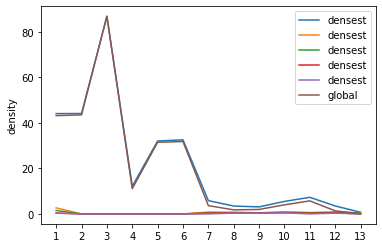

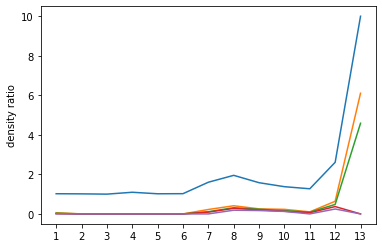

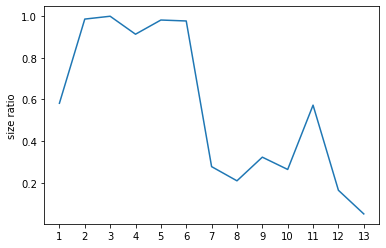

In [83]:

for step in range(8,9):
    
    edge_df = pd.read_csv('dataset/Timelapsed/C-elegans-timelapsed-0'+str(step)+'-condensed-edges.csv')
    G = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.DiGraph)
    un_deg = [len([v for v in G[u] if u in G[v]]) for u in G.nodes]
#     print('original graph has', len(G.edges()),'edges')
    edge_df = pd.read_csv('dataset/Timelapsed/C-elegans-timelapsed-0'+str(step)+'-condensed-edges.csv')
    uG = nx.from_pandas_edgelist(edge_df, 'Pre Synaptic Neuron ID', 'Post Synaptic Neuron ID', create_using=nx.Graph)
    p = sum(un_deg)/len(uG.edges())/2
    
    mypath = 'k_core_results/'+str(step)+'_final/'

    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

    for f_name in onlyfiles:
        edge_df = pd.read_csv(mypath+f_name)
        G = nx.from_pandas_edgelist(edge_df, 'I', 'J')
        gt_G = gt.Graph()
        edge_count = 0
#         p = 264.0/1929
        for e in G.edges:
            if random.uniform(0,1)<p:
                gt_G.add_edge(e[0],e[1])
                gt_G.add_edge(e[1],e[0])
                edge_count += 2
            elif random.uniform(0,1)<0.5:
                gt_G.add_edge(e[0],e[1])
                edge_count += 1
            else:
                gt_G.add_edge(e[1],e[0])
                edge_count += 1

        rand_motif3 = gt.motifs(gt_G, 3, return_maps=True)
        break
    multi_dsd(rand_motif3, len(G.nodes()))